In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
data = pd.read_csv("~/datacsv/cchurn1.csv")

In [4]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [6]:
data.shape

(7032, 22)

In [35]:
#data.isnull().sum()

In [7]:
#data1=data.dropna()

In [30]:
data.SeniorCitizen.unique()

array([0, 1])

In [31]:
data.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
data.gender

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7027      Male
7028    Female
7029    Female
7030      Male
7031      Male
Name: gender, Length: 7032, dtype: object

In [8]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
#) a) find number of male customers:

data.gender.value_counts()    #3549 male customers

Male      3549
Female    3483
Name: gender, dtype: int64

In [11]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
#) b) find number of customers whose InternetService is DSL:

data.InternetService.value_counts()   #2416 of customers whose InternetService is DSL

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [32]:
#) c) find number of customers (Female senior sitizens) whose Payment Method is Mailed Check and store result in new_customer:

#50 customers found

# selecting rows based on condition 
new_customer_df = data[(data['PaymentMethod'] == "Mailed check") & (data['gender'] == "Female") & (data['SeniorCitizen'] == 1)] 
new_customer_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,140,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,177,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,268,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,452,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,471,4933-IKULF,Female,1,No,No,17,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No
693,695,2682-KEVRP,Female,1,No,No,22,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,No
746,748,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.90,No
944,948,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1026,1030,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1108,1113,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [33]:
new_customer_df.shape   #50 customers found

(50, 22)

In [34]:
new_c01 = data[data['PaymentMethod'] == "Mailed check"]
new_c01.shape   #1604 rows

(1604, 22)

In [35]:
new_c02 = new_c01[data['gender'] == "Female"]
new_c02.shape    #775 rows

<ipython-input-35-4c2beb722adb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_c02 = new_c01[data['gender'] == "Female"]


(775, 22)

In [39]:
new_c03 = new_c02[data['SeniorCitizen'] == 1]
new_c03.shape   #50 rows

<ipython-input-39-f61ccbb4321b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_c03 = new_c02[data['SeniorCitizen'] == 1]


(50, 22)

In [14]:
#) d) find number of customers whose tenure is less than 10 months or their TotalCharges is less than 500$ and store in new_customer:

data.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [40]:
# selecting rows based on condition 
new_customer_df02 = data[(data['tenure'] < 10) | (data['TotalCharges'] < 500)] 
new_customer_df02

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,8,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7030,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7019,7031,0871-OPBXW,Female,0,No,No,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7021,7033,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7029,7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [41]:
new_customer_df02.shape     #2222 rows

(2222, 22)

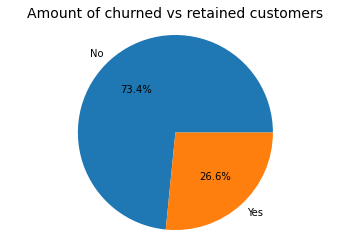

In [42]:
# B) a) Visualization: pie-chart of churned and not:

target = data["Churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned vs retained customers", fontsize=14)
plt.show()


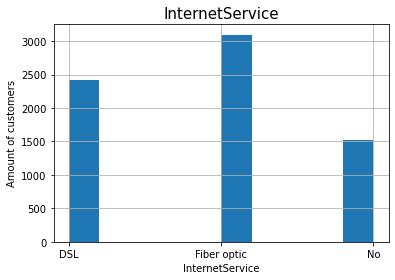

In [44]:
# B) b) Visualization: bar-plot of Internet service:

# Checking the overal distribution
data["InternetService"].hist()
plt.xlabel("InternetService")
plt.ylabel("Amount of customers")
plt.title("InternetService", fontsize=15)
plt.show()